# Imbalanced Data Learning Methods (for Binary Classification)
---
Data: http://sci2s.ugr.es/keel/imbalanced.php

**Also:** Is there a recognizable difference between the latent structure of naturally imbalanced data and artificially imbalanced data? (i.e. data in which one class is naturally much more prevalent than another, vs. data which is naturally balanced but which has had a subset of one class randomly downsampled)

In [118]:
import re
import os
from time import time

import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import imblearn
import tensorflow as tf
import matplotlib.pyplot as plt

## *Get the Data*

In [59]:
directory = "../data/"
file = "page-blocks0.dat"
path = os.path.join(directory, file)

with open(path, "r") as f:
    raw = f.read()
    
metadata = re.search(r"([\s\S]*)@data", raw).group(1).strip().split("\n")
data = re.search(r"@data([\s\S]*)", raw).group(1).strip().split("\n")
data = [x.split(", ") for x in data]
labels =  [example[-1] for example in data]

X = np.array([[float(x) for x in example[:-1]] for example in data]) 
y = np.array([1 if x == "positive" else 0 for x in labels])

## *Explore the Data*

In [110]:
def normalize(X):
    
    sigma = np.std(X, axis = 0)
    mu = np.mean(X, axis = 0)
    
    X_normed = (X - mu)/sigma 
    
    return X_normed

X_normed = normalize(X)

y_pos_ix = [i for i, v in enumerate(y) if v == 1]
y_neg_ix = [i for i, v in enumerate(y) if v == 0]

In [131]:
X.shape, len(y_pos_ix), len(y_neg_ix)

((5472, 10), 559, 4913)

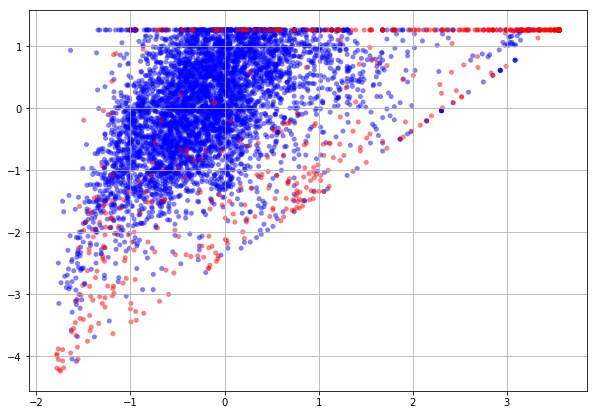

In [161]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1) # aspect = "equal"
ax.grid(True)

alpha = 0.5
red = [1, 0, 0, alpha]
blue = [0, 0, 1, alpha]

def make_scatter(X, indices, color, label, dims = [0, 1]):
    
    [dim_A, dim_B] = dims 
    point_size = 100
    
    ax.scatter(X[indices, dim_A], 
               X[indices, dim_B], 
               s = point_size,
               c = color,
               label = label,
               marker = ".",
               edgecolors = "none")

make_scatter(X_normed, y_neg_ix, blue, "negative", [4, 5])
make_scatter(X_normed, y_pos_ix, red, "positive", [4, 5])

plt.show()

In [162]:
def reduce_dim(matrix, dims, seed=1):
    '''
    USAGE: Perform Truncated SVD to reduce dimensionality of embedding space.
    
    ARGUMENTS: 
    matrix - training data (sparse matrix) with shape (n_features, n_samples)
    dims - number of dimensions to project data into
    
    RETURNS:
    X_new - array of reduced dimensionality
    '''
    
    tic =time()
    print('Performing Truncated SVD...')
    svd = TruncatedSVD(n_components = dims, random_state = seed)
    X = svd.fit_transform(matrix) # matrix.shape = (n_samples, n_features)
    toc = time()
    print('Embeddings reduced from %d to %d dimensions through TruncatedSVD. (Time elapsed: %.2f s)' 
          % (matrix.shape[1], dims, (toc-tic)))
    return X

# with X_embedded.shape = (5000, 128), perplexity = 30, elapsed TSNE time ~ 5 minutes.
def TSNE2D(X, seed=1):
    '''
    USAGE: Perform TSNE to reduce embedding space to 2D
    ARGUMENT: X - high-dimensional training array (n_samples, n_features ~ 100)
    RETURNS: X_embedded - 2D matrix (n_samples, 2)
    '''
    
    tic = time()
    print('Performing TSNE...')
    X_embedded = TSNE(n_components=2, perplexity=30, random_state = seed).fit_transform(X)
    toc = time()
    print('Embeddings reduced to 2 dimensions through TSNE. (Time elapsed: %.2f s)' % (toc-tic))
    return X_embedded

# X_SVD = reduce_dim(X_normed, 2)
# X_TSNE = TSNE2D(X_normed)

In [163]:
X_TSNE_2 = TSNE(n_components=2, perplexity=100, random_state = 1).fit_transform(X)

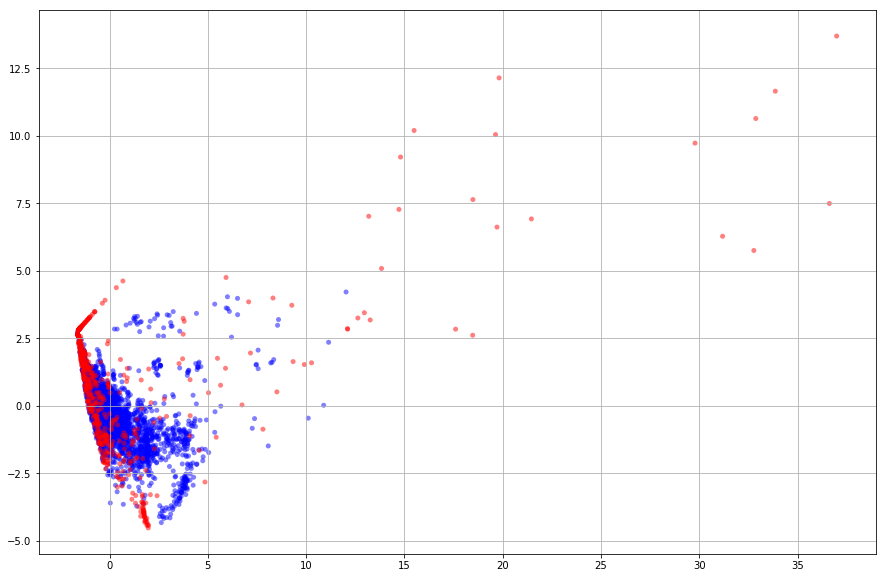

In [147]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1) # aspect = "equal"
ax.grid(True)

make_scatter(X_SVD, y_neg_ix, blue, "negative")
make_scatter(X_SVD, y_pos_ix, red, "positive")
# make_scatter(X_SVD, y_neg_ix, blue, "negative")

plt.show()

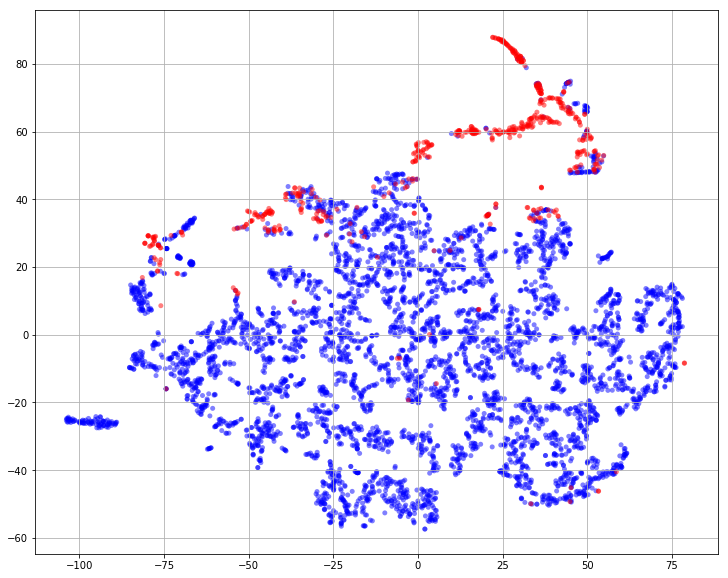

In [136]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1, aspect = "equal") # aspect = "equal"
ax.grid(True)

make_scatter(X_TSNE, y_neg_ix, blue, "negative")
make_scatter(X_TSNE, y_pos_ix, red, "positive")

plt.show()

---

## Naive Downsampling

## Naive Upsampling

## Bagging

## Sigmoid Neural Network

## Sigmoid-weighted sigmoid ensemble